<a href="https://colab.research.google.com/github/rickiepark/SM-Summer-ML/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_08_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

In [3]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

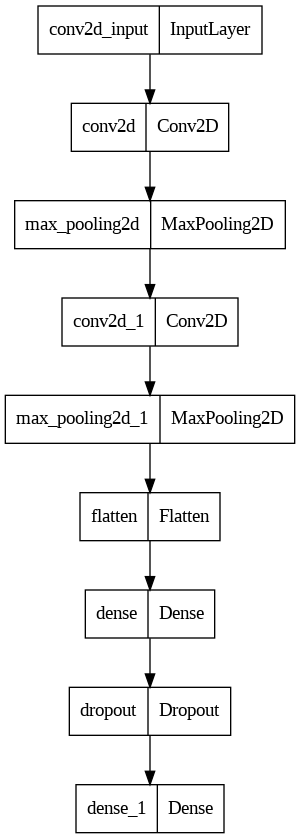

In [6]:
keras.utils.plot_model(model)

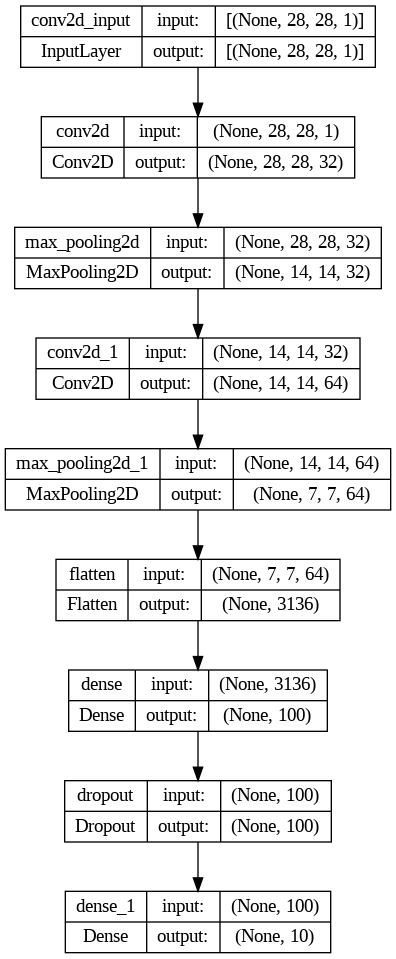

In [7]:
keras.utils.plot_model(model, show_shapes=True)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [9]:
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 13s 5ms/step - loss: 0.5340 - accuracy: 0.8081 - val_loss: 0.3278 - val_accuracy: 0.8795
Epoch 2/20
  12/1500 [..............................] - ETA: 14s - loss: 0.3452 - accuracy: 0.8724

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3482 - accuracy: 0.8736 - val_loss: 0.2842 - val_accuracy: 0.8953
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2966 - accuracy: 0.8940 - val_loss: 0.2528 - val_accuracy: 0.9036
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2627 - accuracy: 0.9045 - val_loss: 0.2434 - val_accuracy: 0.9097
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2424 - accuracy: 0.9126 - val_loss: 0.2347 - val_accuracy: 0.9141
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2216 - accuracy: 0.9193 - val_loss: 0.2417 - val_accuracy: 0.9102
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2055 - accuracy: 0.9252 - val_loss: 0.2165 - val_accuracy: 0.9205
Epoch 8/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1932 - accuracy: 0.9283 - val_loss: 0.2258 - val_accuracy: 0.9172
Epo

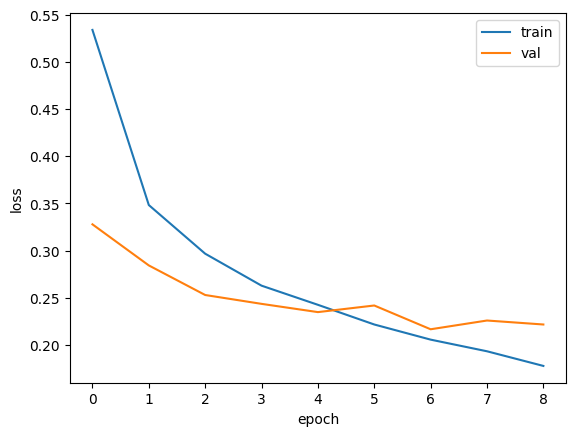

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2165 - accuracy: 0.9205


[0.2164931446313858, 0.9204999804496765]

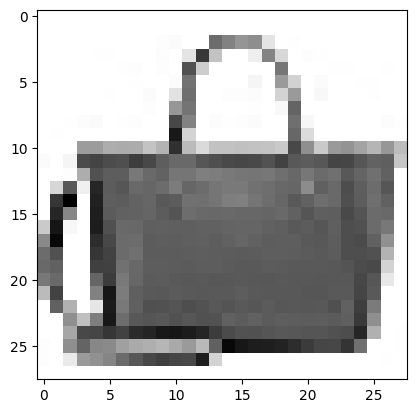

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [15]:
val_scaled[0].shape

(28, 28, 1)

In [13]:
model.predict(val_scaled[0:1])

1/1 [==============================] - 0s 320ms/step


array([[4.3814653e-14, 5.2789116e-21, 2.1291683e-19, 7.3395463e-18,
        6.8170444e-15, 2.7437015e-15, 1.4006227e-17, 2.2314019e-14,
        1.0000000e+00, 1.8757925e-13]], dtype=float32)